# 2D Mean field model for propagating waves

This Notebook will guide you through the simulation of propagating waves in 2D, using a mean field model that I developed in Alain Destexhe's lab for computational neuroscience as part of a two-months internship (July-August 2020). This model is based on previous 1D models made in the lab by Yann Zerlaut (Zerlaut et al. J Comput. Neurosci. 2017) and Matteo DiVolo (Di Volo et al. Neural Comp. 2019).

Before getting started, make sure that Cython has successfully built the model as explained in the 'ReadMe.txt' file. 

If anything seems unclear or broken, don't hesitate to contact me at roquesaxel98@gmail.com or axel.roques@espci.fr, I will be happy to help :)
                                                                                - Axel

# Dependencies

In [ ]:
print('---- Tested under the following settings:')
import sys
print('Python version:', sys.version)
print('-> Recommended: Python >= 3')
import Cython
print('Cython version:', Cython.__version__)
import scipy
print('SciPy version:', scipy.__version__)
import numpy as np
print('NumPy version:', np.__version__)
import matplotlib
%matplotlib notebook
print('Matplotlib version:', matplotlib.__version__)
print('---- Required plot tools:')
print('\t - Celluloid (installation: pip install celluloid)')
print('\t - ffmpeg (installation: conda install -c conda-forge ffmpeg)')

# Connectivity Matrix

The model uses a 'connectivity matrix' that stores informations on each network's neighbours (distance, weight and position). Because of varying boundary conditions for each model, every model has its own matrix. 

Each matrix only has to be constructed once: it will be saved in the /data folder. So the next few cells only have to be executed once. 

It is possible to modify the weight associated to each neighbour directly in the Python files 'connectivity_matrix_modelname.py'. I found that 2 pairs of weight values work the best in the simulations (they're the one written in the .py files) but I'm sure that some other couple of values can be good as well. Then, the matrix will have to be reconstructed using these cells.

## for the 'Sheet Model'

In [ ]:
from connectivity_matrix_sheet import make_conn_matrix_sheet

custom_ring_params={\
       'X_discretization':30,
       'X_extent':36,
       'Z_discretization':30,  
       'Z_extent':36,
       'exc_connect_extent':5,
       'inh_connect_extent':1,
       'conduction_velocity_mm_s':300}

make_conn_matrix_sheet('SHEET-2D', custom_ring_params)

## for the 'Torus Model' 

In [ ]:
from connectivity_matrix_torus import make_conn_matrix_torus

custom_ring_params={\
       'X_discretization':30,
       'X_extent':36,
       'Z_discretization':30,  
       'Z_extent':36,
       'exc_connect_extent':5,
       'inh_connect_extent':1,
       'conduction_velocity_mm_s':300}

make_conn_matrix_torus('RING-2D', custom_ring_params)

## for the 'Torus with random elements Model'

In [ ]:
from connectivity_matrix_torus_random import make_conn_matrix_torus_random

custom_ring_params={\
        'X_discretization':30,
        'X_extent':36,
        'Z_discretization':30,  
        'Z_extent':36,
        'exc_connect_extent':5,
        'inh_connect_extent':1,
        'conduction_velocity_mm_s':300}

random_conn_params={\
        'nb_random_conn':180,
        'weight_rand':0.5}

make_conn_matrix_torus_random('RING-2D', custom_ring_params, random_conn_params)

# Run Simulations

Simulations are launched using the following cells. The simulation computes the activity rates of the excitatory and inhibitory populations and the network's membrane potential using the explicit Euler method.

Arguments for the function include:
- 'RS-cell', 'FS-cell': type of neurons that are simulated
- 'CONFIG1': standard configuration for each network (mainly sets synapses and intra-connectivity parameters)
- 'SHEET-2D': example geometry for the model (the only changes between geometry are boundary conditions)
- 'CENTER': stimulation name. See 'model_stim.py' for a full list of all possible stimulations
- sim_time: simulation time (a float, in seconds)
- custom_ring_params: parameters for the geometry. The custom ring parameters reported here are actually the default ones that can be found in 'model_params.py'
- custom_stim_params: custom parameters for the stimulation. The custom stimulation parameters reported here are actually the default ones that can be found in 'model_stim.py'

The function returns:
- a dictionary containing the different simulation parameters
- a time vector with timestep 0.5ms and length = simulation_time
- X and Z vectors for the (x,z) position of the networks
- Fe_aff, Fe, Fi, muVn: 3D arrays containing the values of the afferent stimulation (Fe_aff), the excitatory activity rate (Fe), the inhibitory activity rate (Fi) et the normalized membrane potential (muVn). Each 2D slice of these arrays correspond to the immediate value of Fe_aff, Fe, Fi and muVn at every position in the 2D network. The third dimension gives the evolution of these values with time

Once the simulation is finished, the results are saved as a numpy array in the /data folder.

## with the 'Sheet Model'

In [ ]:
from sheet_model import Euler_method_for_ring_model

simulation_time = 0.8 # in seconds

print('---> Mean field simulation (2D): \n')
simulation_parameters, t, X, Z, Fe_aff, Fe, Fi, muVn = Euler_method_for_ring_model(\
                                                    'RS-cell', 'FS-cell',\
                                                    'CONFIG1', 'SHEET-2D', 'CENTER',\
                                                    sim_time = simulation_time,
                                                    custom_ring_params={\
                                                       'X_discretization':30,
                                                       'X_extent':36,
                                                       'Z_discretization':30,  
                                                       'Z_extent':36,
                                                       'exc_connect_extent':5,
                                                       'inh_connect_extent':1,
                                                       'conduction_velocity_mm_s':300}, # in mm/s
                                                    custom_stim_params={\
                                                                        'sX':1, 'sZ':1, 'amp':15,
                                                                        'Tau1':50e-3, 'Tau2':150e-3},
                                                    )
file = 'file_name_here.npy'
np.save('data/' + file, [simulation_parameters, t, X, Z, Fe_aff, Fe, Fi, muVn])
print('\n -------> Results saved in', str('/data/' + file))

## with the 'Torus Model'

In [ ]:
from torus_model import Euler_method_for_ring_model

simulation_time = 0.8 # in seconds

print('-------> Mean field simulation (2D): \n')
simulation_parameters, t, X, Z, Fe_aff, Fe, Fi, muVn = Euler_method_for_ring_model(\
                                                    'RS-cell', 'FS-cell',\
                                                    'CONFIG1', 'RING-2D', 'CENTER',\
                                                    sim_time = simulation_time,
                                                    custom_ring_params={\
                                                       'X_discretization':30,
                                                       'X_extent':36,
                                                       'Z_discretization':30,  
                                                       'Z_extent':36,
                                                       'exc_connect_extent':5,
                                                       'inh_connect_extent':1,
                                                       'conduction_velocity_mm_s':300}, #mm/s
                                                    custom_stim_params={\
                                                                        'sX':1, 'sZ':1, 'amp':15,
                                                                        'Tau1':50e-3, 'Tau2':150e-3},
                                                    )
file = 'file_name_here.npy'
np.save('data/' + file, [simulation_parameters, t, X, Z, Fe_aff, Fe, Fi, muVn])
print('\n -------> Results saved in', str('/data/' + file))

## with the 'Torus with random elements Model'

One thing to note in this model is that the function returns a supplementary parameter: random_conn_params. It is a dictionary created with the connectivity matrix that retain the informations on the randomness of the model. To be more precise, here is a description of each key of this dictionary:
- 'nb_random_conn' is the total number of random connections in the model
- 'weight_rand' is the weight assigned to this random neighbour
- 'x_pixel' and 'z_pixel' are the x and z positions of networks that will have a random connection
- 'x_neigh' and 'z_neigh' are the corresponding x and z positions of the randomly connected networks

In [ ]:
from torus_model_random import Euler_method_for_ring_model

simulation_time = 0.8 # in seconds

print('-------> Mean field simulation (2D): \n')
simulation_parameters, random_conn_params, t, X, Z, Fe_aff, Fe, Fi, muVn = \
                                                Euler_method_for_ring_model(\
                                                    'RS-cell', 'FS-cell',\
                                                    'CONFIG1', 'RING-2D', 'CENTER',\
                                                    sim_time = simulation_time,
                                                    custom_ring_params={\
                                                       'X_discretization':30,
                                                       'X_extent':36,
                                                       'Z_discretization':30,  
                                                       'Z_extent':36,
                                                       'exc_connect_extent':5,
                                                       'inh_connect_extent':1,
                                                       'conduction_velocity_mm_s':300}, #mm/s
                                                    custom_stim_params={\
                                                                        'sX':1, 'sZ':1, 'amp':15,
                                                                        'Tau1':50e-3, 'Tau2':150e-3},
                                                    )
file = 'file_name_here.npy'
np.save('data/' + file, [simulation_parameters, random_conn_params, t, X, Z, Fe_aff, Fe, Fi, muVn])
print('\n -------> Results saved in', str('/data/' + file))

# Load a simulation

## For the 'Sheet Model' and 'Torus Model'

In [ ]:
file = 'file_name_here.npy'
simulation_parameters, t, X, Z, Fe_aff, Fe, Fi, muVn = \
    np.load('data/' + file, allow_pickle=True)
print('Simulation length (ms):', len(t))

## For the 'Torus with random elements Model'

In [ ]:
file = 'file_name_here.npy'
simulation_parameters, random_conn_params, t, X, Z, Fe_aff, Fe, Fi, muVn = \
    np.load('data/' + file, allow_pickle=True)
print('Simulation length (ms):', len(t))

# Plot tools

Here are some plotting tools used to do some of the figures in the report.
Most of them can be found in the toolbox.py file.

'exemple_data' can be loaded from the /data folder to test these functions. It comes from a 0.8s simulation with the torus model, 'CENTER' stimulation.

<IPython.core.display.Javascript object>


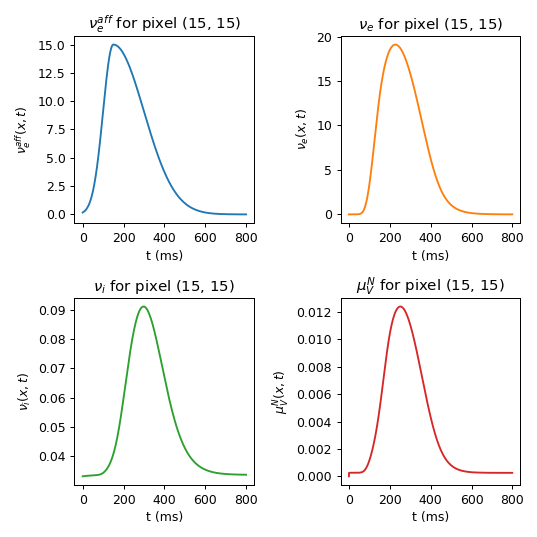

In [30]:
"""
2D plots of Fe_aff, Fe, Fi and muVn against time, for a single network at (x,z)
"""
from toolbox import xz_plot
xz_plot(Fe_aff, Fe, Fi, muVn, len(t), 15, 15)

<IPython.core.display.Javascript object>


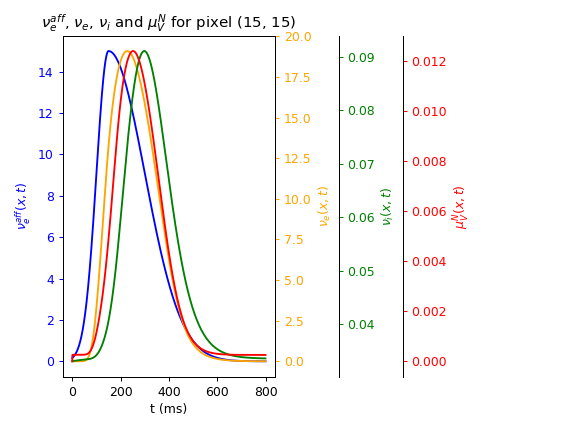

In [31]:
"""
2D plot that combines the different plots of Fe_aff, Fe, Fi and muVn against time on the same plot,
for a single network at (x,z)
"""
from toolbox import xz_combined
xz_combined(Fe_aff, Fe, Fi, muVn, len(t), 15, 15)

In [ ]:
"""
Movie of contour plots of Fe_aff, Fe, Fi and muVn in the (x,z) plane. 
One image is taken every 'frames' second
"""
from toolbox import xz_movie
xz_movie(Fe_aff, Fe, Fi, muVn, X, Z, len(t), frames=10, title='file_name_here', save=True)

In [ ]:
"""
Plots the random connections in the 'Torus with random elements Model'
"""
from toolbox import show_rand_conn
show_rand_conn(random_conn_params)

# Some useful cells for more flexibility on plots

In [ ]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
from IPython.display import HTML
import matplotlib.pylab as plt
from celluloid import Camera
import matplotlib as mpl

"""
Makes a movie of the membrane potential
"""

save = True
title = 'file_name_here'

def colorbar_format(x, pos):
    a = '{:.3f}'.format(x)
    return format(a)

fig, ax = plt.subplots(1)
plt.title('$\\delta \mu_V^{N}$')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Z (mm)')
camera = Camera(fig)

for i in range(0, len(t), 10):
    cbar = ax.contourf(X, Z, muVn[i,:,:].T,
                    np.linspace(min([0,muVn.min()]), muVn.max(), 20),
                    cmap=mpl.cm.viridis)
    camera.snap()

anim = camera.animate()

if save:
    anim.save('figures/' + title + '.mp4')
    
fig.colorbar(cbar, ax=ax, format=ticker.FuncFormatter(colorbar_format))
plt.show()
HTML(anim.to_html5_video())

In [ ]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl

"""
Plots the contour plots of Fe_aff, Fe, Fi and muVn in the (x,z) plane at time t
"""

file = 'file_name_here.npy'
_, _, X, Z, Fe_aff, Fe, Fi, muVn = np.load('data/' + file, allow_pickle=True)

t = 500

def colorbar_format(x, pos):
    a = '{:.3f}'.format(x)
    return format(a)

fig, axs = plt.subplots(2, 2, figsize=(8,6))
axs[0, 0].set_title('$\\nu_e^{aff}$')
axs[0, 0].set(xlabel='X (mm)', ylabel='Z (mm)')
axs[0, 1].set_title('$\\nu_e$')
axs[0, 1].set(xlabel='X (mm)', ylabel='Z (mm)')    
axs[1, 0].set_title('$\\nu_i$')
axs[1, 0].set(xlabel='X (mm)', ylabel='Z (mm)')    
axs[1, 1].set_title('$\\mu_V^{N}$')
axs[1, 1].set(xlabel='X (mm)', ylabel='Z (mm)')


cbar0 = axs[0, 0].contourf(X, Z, Fe_aff[t,:,:].T,
            np.linspace(Fe_aff.min(), Fe_aff.max(), 20),
            cmap=mpl.cm.viridis)
cbar1 = axs[0, 1].contourf(X, Z, Fe[t,:,:].T,
            np.linspace(Fe.min(), Fe.max(), 20),
            cmap=mpl.cm.viridis)
cbar2 = axs[1, 0].contourf(X, Z, Fi[t,:,:].T,
            np.linspace(Fi.min(), Fi.max(), 20),
            cmap=mpl.cm.viridis)
cbar3 = axs[1, 1].contourf(X, Z, muVn[t,:,:].T,
            np.linspace(muVn.min(), muVn.max(), 20),
            cmap=mpl.cm.viridis)

fig.colorbar(cbar0, ax=axs[0, 0], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar1, ax=axs[0, 1], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar2, ax=axs[1, 0], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar3, ax=axs[1, 1], format=ticker.FuncFormatter(colorbar_format))

fig.tight_layout()
plt.show()

In [ ]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib as mpl

"""
Useful to see the suppressing wave arising from the collision of two waves
Requires the simulations of both wave seperately and together
"""
# Load the simulation data
file = 'wave_from_right_only.npy'
_, t, X, Z, _, _, _, muVn_solo_R = np.load('data/' + file, allow_pickle=True)
file = 'wave_from_left_only.npy'
_, _, _, _, _, _, _, muVn_solo_L = np.load('data/' + file, allow_pickle=True)
file = 'wave_colliding.npy'
_, _, _, _, _, _, _, muVn_both = np.load('data/' + file, allow_pickle=True)

# We compute suppressive wave 
muVn_sum_solo = muVn_solo_R + muVn_solo_L
muVn_diff = muVn_sum_solo - muVn_both

# We plot
frames = 10
title = 'file_name_here'
save = False

def colorbar_format(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs[0, 0].set_title('$\\mu_V^{N}$ solo R')
axs[0, 0].set(xlabel='X (mm)', ylabel='Z (mm)')
axs[0, 1].set_title('$\\mu_V^{N}$ sum solo (L+R)')
axs[0, 1].set(xlabel='X (mm)', ylabel='Z (mm)')    
axs[1, 0].set_title('$\\mu_V^{N}$ colliding')
axs[1, 0].set(xlabel='X (mm)', ylabel='Z (mm)')    
axs[1, 1].set_title('$\\mu_V^{N}$ suppressive wave')
axs[1, 1].set(xlabel='X (mm)', ylabel='Z (mm)')

camera = Camera(fig)

for i in range(0, len(t), frames):
    cbar0 = axs[0, 0].contourf(X, Z, muVn_solo_R[i,:,:].T,
                np.linspace(muVn_solo_R.min(), muVn_solo_R.max(), 20),
                cmap=mpl.cm.viridis)
    cbar1 = axs[0, 1].contourf(X, Z, muVn_sum_solo[i,:,:].T,
                np.linspace(muVn_sum_solo.min(), muVn_sum_solo.max(), 20),
                cmap=mpl.cm.viridis)
    cbar2 = axs[1, 0].contourf(X, Z, muVn_both[i,:,:].T,
                np.linspace(muVn_both.min(), muVn_both.max(), 20),
                cmap=mpl.cm.viridis)
    cbar3 = axs[1, 1].contourf(X, Z, muVn_diff[i,:,:].T,
                np.linspace(muVn_diff.min(), muVn_diff.max(), 20),
                cmap=mpl.cm.viridis)
    camera.snap()

anim = camera.animate()

fig.colorbar(cbar0, ax=axs[0, 0], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar1, ax=axs[0, 1], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar2, ax=axs[1, 0], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar3, ax=axs[1, 1], format=ticker.FuncFormatter(colorbar_format))
fig.tight_layout()
plt.show()

if save:
    anim.save('figures/' + title + '.mp4')

In [ ]:
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from celluloid import Camera
import matplotlib as mpl

"""
Useful to make the line-motion illusion 
Requires the simulations of the dot and the line seperately and together, and also a moving line
for comparison
"""
# Load the simulation data
file = 'single_dot.npy'
_, t, X, Z, _, _, _, muVn_dot = np.load('data/' + file, allow_pickle=True)
file = 'vertical_line.npy'
_, _, _, _, _, _, _, muVn_vert_line = np.load('data/' + file, allow_pickle=True)
file = 'moving_vertical_line.npy'
_, _, _, _, _, _, _, muVn_mv_vert_line = np.load('data/' + file, allow_pickle=True)
file = 'dot_and_line.npy'
_, _, _, _, _, _, _, muVn_line_motion = np.load('data/' + file, allow_pickle=True)

# We plot
frames = 2
title = 'file_name_here'
save = False

def colorbar_format(x, pos):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

fig, axs = plt.subplots(2, 2, figsize=(8,8))
axs[0, 0].set_title('$\\mu_V^{N}$ single dot')
axs[0, 0].set(xlabel='X (mm)', ylabel='Z (mm)')
axs[0, 1].set_title('$\\mu_V^{N}$ vertical line')
axs[0, 1].set(xlabel='X (mm)', ylabel='Z (mm)')    
axs[1, 0].set_title('$\\mu_V^{N}$ moving vertical line')
axs[1, 0].set(xlabel='X (mm)', ylabel='Z (mm)')    
axs[1, 1].set_title('$\\mu_V^{N}$ line motion')
axs[1, 1].set(xlabel='X (mm)', ylabel='Z (mm)')

camera = Camera(fig)

for i in range(0, len(t), frames):
    cbar0 = axs[0, 0].contourf(X, Z, muVn_dot[i,:,:].T,
                np.linspace(muVn_dot.min(), muVn_dot.max(), 20),
                cmap=mpl.cm.viridis)
    cbar1 = axs[0, 1].contourf(X, Z, muVn_vert_line[i,:,:].T,
                np.linspace(muVn_vert_line.min(), muVn_vert_line.max(), 20),
                cmap=mpl.cm.viridis)
    cbar2 = axs[1, 0].contourf(X, Z, muVn_mv_vert_line[i,:,:].T,
                np.linspace(muVn_mv_vert_line.min(), muVn_mv_vert_line.max(), 20),
                cmap=mpl.cm.viridis)
    cbar3 = axs[1, 1].contourf(X, Z, muVn_line_motion[i,:,:].T,
                np.linspace(muVn_line_motion.min(), muVn_line_motion.max(), 20),
                cmap=mpl.cm.viridis)
    camera.snap()

anim = camera.animate()

fig.colorbar(cbar0, ax=axs[0, 0], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar1, ax=axs[0, 1], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar2, ax=axs[1, 0], format=ticker.FuncFormatter(colorbar_format))
fig.colorbar(cbar3, ax=axs[1, 1], format=ticker.FuncFormatter(colorbar_format))
fig.tight_layout()
plt.show()

if save:
    anim.save('figures/' + title + '.mp4')

# Miscellaneous stuff to draw complex stimuli

In [ ]:
"""
Draws a horizontal line
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

sim_time = 1
dt = 5e-4

def animate(k):
    i = min(k, len(t))
 #   line.set_data(X[:i], Z[:i])
    point.set_data(X[i], Z[i])
    return point

fig, ax = plt.subplots()

t = np.linspace(0, sim_time, int(sim_time/dt), endpoint=False)

Z = [18 for i in range(len(t))]
X = []
for i in range(len(t)):
    if i < 36:
        X.append(i)
    else:
        X.append(36)

#line, = ax.plot([],[], color='blue')
point, = ax.plot([], [], ls="none", marker="o")

plt.xlim(0, 36)
plt.ylim(0, 36)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
plt.title('Visual stimuli')
point_ani = animation.FuncAnimation(fig=fig, func=animate, frames=len(t),
                                   interval=1, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')
plt.plot(X,Z)
plt.show()

In [ ]:
"""
Draws a rectangle
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

sim_time = 1
dt = 5e-4

def animate(k):
    i = min(k, len(t))
 #   line.set_data(X[:i], Z[:i])
    point.set_data(X0[i], Z0[i])
    return point

fig, ax = plt.subplots()

t = np.linspace(0, sim_time, int(sim_time/dt), endpoint=False)
X = np.linspace(0, 36, 30, endpoint=True)
Z = np.linspace(0, 36, 30, endpoint=True)
Z0 = []
X0 = []
for x in range(2, len(X)-3):
    X0.append(X[x])
    Z0.append(Z[int(len(Z)*2/3.)])
for z in range(int(len(Z)*2/3.), int(len(Z)*1/3.)-1, -1):
    X0.append(X[len(X)-3])
    Z0.append(Z[z])
for x in range(len(X)-3, 1, -1):
    X0.append(X[x])
    Z0.append(Z[int(len(Z)*1/3.)])
for z in range(int(len(Z)*1/3.), int(len(Z)*2/3.)+1):
    X0.append(X[2])
    Z0.append(Z[z])

#line, = ax.plot([],[], color='blue')
point, = ax.plot([], [], ls="none", marker="o")

plt.xlim(0, 36)
plt.ylim(0, 36)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
plt.title('Visual stimuli')
point_ani = animation.FuncAnimation(fig=fig, func=animate, frames=len(t),
                                   interval=1, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

plt.plot(X0,Z0)
plt.show()

In [ ]:
"""
Draws a circle
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

sim_time = 1
dt = 5e-4

def animate(k):
    i = min(k, len(t))
    point.set_data(X0[i], Z0[i])
    return point

fig, ax = plt.subplots()

t = np.linspace(0, sim_time, int(sim_time/dt), endpoint=False)
X = np.linspace(0, 36, 30, endpoint=True)
Z = np.linspace(0, 36, 30, endpoint=True)
radius = 10
Nframes = 100
x0 = X[int(len(X)/2.)]
z0 = Z[int(len(Z)/2.)]
X0 = []
Z0 = []
for i in range(Nframes): 
    time = 2.*np.pi*float(i/(Nframes - 1.))
    X0.append(x0 - 10*np.cos(time))
    Z0.append(z0 - -10*np.sin(time))

#line, = ax.plot([],[], color='blue')
point, = ax.plot([], [], ls="none", marker="o")

plt.xlim(0, 36)
plt.ylim(0, 36)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
plt.title('Visual stimuli')
point_ani = animation.FuncAnimation(fig=fig, func=animate, frames=len(t),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

plt.plot(X0,Z0)
plt.show()

In [ ]:
"""
Draws a smiley
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

sim_time = 1
dt = 5e-4

def animate(k):
    i = min(k, len(t))
    point_smile.set_data(X0_smile[i], Z0_smile[i])
    point_O.set_data(X0_O[i], Z0_O[i])
    point_i.set_data(X0_i[i], Z0_i[i])
    return point_smile, point_O, point_i

fig, ax = plt.subplots()

t = np.linspace(0, sim_time, int(sim_time/dt), endpoint=False)
X = np.linspace(0, 36, 30, endpoint=True)
Z = np.linspace(0, 36, 30, endpoint=True)

# Smile
radius = 10
Nframes = 6
x0 = X[int(len(X)/2.)]
z0 = Z[int(len(Z)/2.5)]
X0_smile = []
Z0_smile = []
for i in range(Nframes): 
    time = 2*np.pi*float(i/(Nframes - 1.))/2
    X0_smile.append(x0 - radius*np.cos(time))
    Z0_smile.append(z0 - radius*np.sin(time))  
# Eye O
radius = 1
Nframes = 6
x0 = X[int(len(X)/3)]
z0 = Z[int(len(Z)*2/3)]
X0_O = []
Z0_O = []
for i in range(Nframes): 
    time = 2*np.pi*float(i/(Nframes - 1.))
    X0_O.append(x0 - radius*np.cos(time))
    Z0_O.append(z0 - radius*np.sin(time))
# Eye -
Z0_i = []
X0_i = []
for x in range(16, 22):
    X0_i.append(X[x])
    Z0_i.append(Z[int(len(Z)*2/3.)])


point_smile, = ax.plot([], [], ls="none", marker="o")
point_O, = ax.plot([], [], ls="none", marker="o")
point_i, = ax.plot([], [], ls="none", marker="o")

plt.xlim(0, 36)
plt.ylim(0, 36)
plt.xlabel('X (mm)')
plt.ylabel('Z (mm)')
plt.title('Visual stimuli')
point_ani = animation.FuncAnimation(fig=fig, func=animate, frames=len(t),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

plt.plot(X0_smile,Z0_smile, X0_O, Z0_O, X0_i, Z0_i)
print(len(X0_smile), len(X0_O), len(X0_i))
plt.show()